In [1]:
import sys,os,pickle,copy
sys.path.append('/mnt/home/szheng/projects/seq_detection2/code')
sys.path.append('/mnt/home/szheng/projects/util_code')
sys.path.append('/mnt/home/szheng/projects/nmf_analysis')
sys.path.append('/mnt/home/szheng/projects/nmf_analysis/scripts')
import numpy as np
import numpy
import pandas as pd
import scipy
import data_prep_new as dpn
import place_cell_analysis as pa
import plot_helper as ph
from importlib import reload
import seaborn as sns

import preprocess as prep

from sklearn.decomposition import NMF

import matplotlib as mpl
mpl.rcParams['image.cmap'] = 'Greys'
import matplotlib.pyplot as plt
%matplotlib inline

import nmf_analysis as na
import nmf_plot as nmfp
reload(na)
import data_prep_pyn as dpp

import pynapple as nap
from sklearn.cluster import KMeans
import database
db = database.db

In [2]:
import ruptures as rpt

import nmf_test as nt

In [59]:
data_dir_full=db.query('owner=="roman"')['data_dir_full'][0]
data_dir_full

'/mnt/home/szheng/ceph/ad/roman_data/e13/e13_16f1/e13_16f1_210302'

In [61]:
mat_to_return=prep.load_stuff(data_dir_full,sessionPulses = '*SessionPulses.Events.mat')
# sessionPulses=mat_to_return['sessionPulses']
behavior=mat_to_return['behavior']

prep_res = dpp.load_spk_beh_df(data_dir_full,force_reload=False,extra_load={})
spk_beh_df=prep_res['spk_beh_df']
cell_cols_d = prep_res['cell_cols_d']
beh_df = prep_res['beh_df']

load *SessionPulses.Events.mat failed


In [73]:
n_compo=6
import nmf_one_session as nos
nmf_res = nos.nmf_one_session(data_dir_full,kwargs_={'n_compo':n_compo,'dosave':True,'doplots':False})

/mnt/home/szheng/ceph/ad/roman_data/e13/e13_16f1/e13_16f1_210302/py_data/nmf/nmf_6.p saved!


In [34]:
# sessionname=list(sessionPulses.keys())[0]
# sessionPulses[sessionname].stim

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0],
      dtype=uint8)

In [74]:
# res = pickle.load(open(os.path.join(data_dir_full,'py_data','nmf','nmf_4.p'),'rb'))
res = nmf_res

(<Figure size 702x1641.6 with 4 Axes>,
 {'W': <AxesSubplot:label='W', xlabel='component', ylabel='neuron'>,
  'H': <AxesSubplot:label='H', ylabel='component'>})

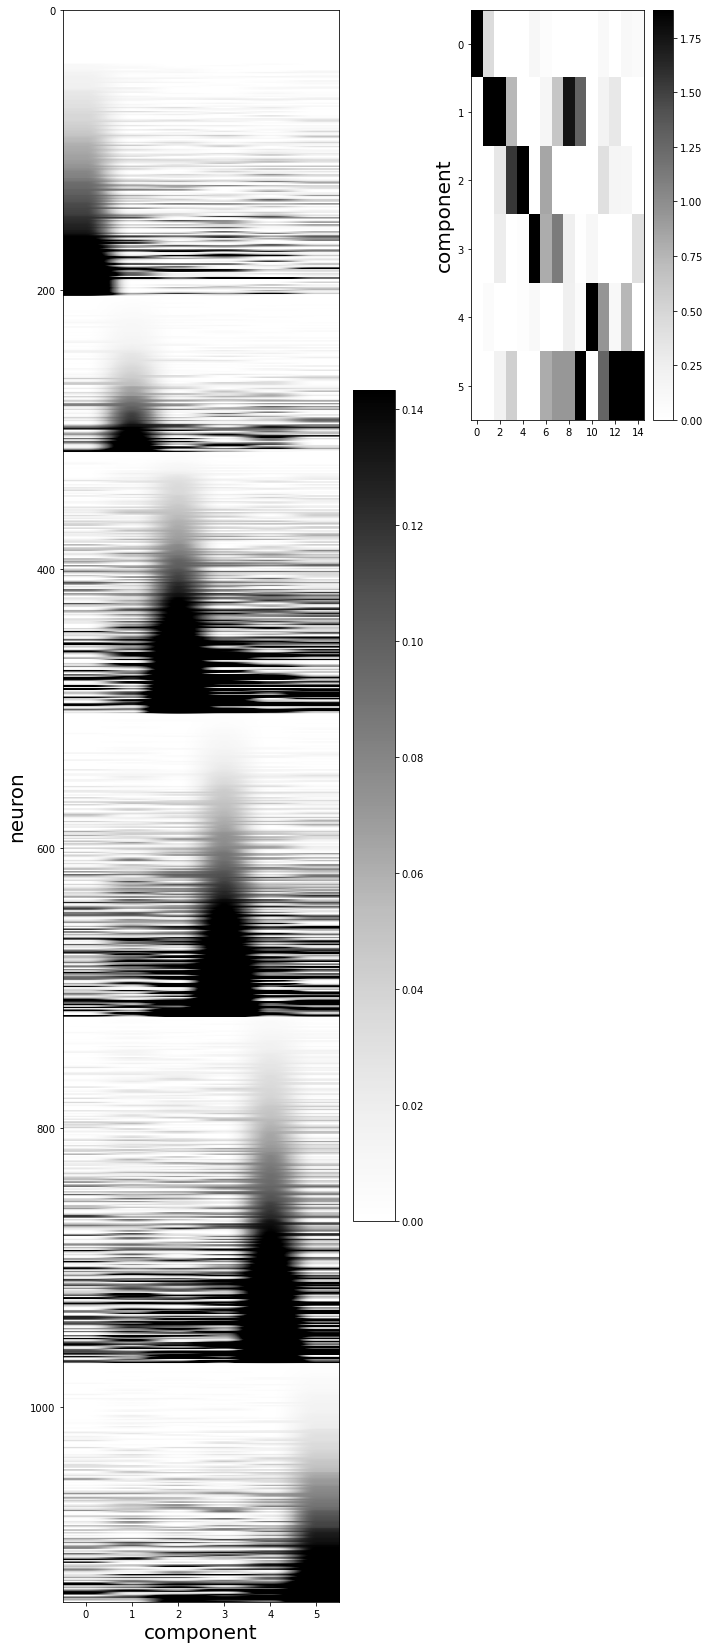

In [75]:
key = (0,0)
peak_inds=res['W_df_peaks_only_d'][key].index

X_normed_restacked_df = res['X_normed_restacked_df_d'][key]
X_normed_restacked_df_peaks_only = X_normed_restacked_df.loc[peak_inds]
W_sorted=res['W_sorted_d'][key]
H_sorted=res['H_sorted_d'][key]
nmfp.plot_wh(W_sorted,H_sorted)

<AxesSubplot:xlabel='trial'>

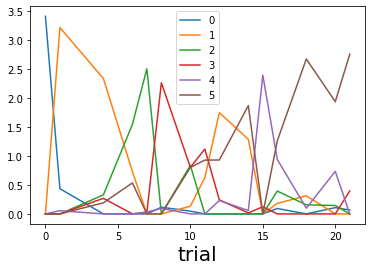

In [76]:
H_sorted.T.plot()
# plt.plot(sessionPulses[sessionname].stim)

In [77]:
signal = H_sorted.values.T
H_instability = nt.test_contiguity_independent_multidim(signal,n_shuffle=500,sig_thresh=0.05,n_change_pts_l=[1,2,3])


100%|██████████| 500/500 [00:00<00:00, 1479.09it/s]

100%|██████████| 500/500 [00:01<00:00, 477.78it/s]

100%|██████████| 500/500 [00:00<00:00, 1489.95it/s]

100%|██████████| 500/500 [00:01<00:00, 477.31it/s]

100%|██████████| 500/500 [00:00<00:00, 1474.68it/s]

100%|██████████| 500/500 [00:01<00:00, 474.63it/s]

100%|██████████| 500/500 [00:00<00:00, 1480.94it/s]

100%|██████████| 500/500 [00:01<00:00, 475.83it/s]

100%|██████████| 500/500 [00:00<00:00, 1476.33it/s]

100%|██████████| 500/500 [00:01<00:00, 475.52it/s]

100%|██████████| 500/500 [00:00<00:00, 1459.39it/s]

100%|██████████| 500/500 [00:01<00:00, 471.44it/s]

dim: 100%|██████████| 6/6 [00:14<00:00,  2.43s/it]


In [78]:
H_instability

p                   error                      issig                \
       1      2      3         1         2         3      1      2      3   
0  0.000  0.016  0.052  4.470179  4.463202  4.460939   True   True  False   
1  0.134  0.394  0.342  9.245002  8.365813  6.235607  False  False  False   
2  0.350  0.094  0.098  5.613287  1.203577  1.027119  False  False  False   
3  0.650  0.138  0.118  4.743748  1.384311  1.363003  False  False  False   
4  0.124  0.012  0.054  3.748126  1.428658  1.404886  False   True  False   
5  0.008  0.004  0.018  4.664960  2.518529  2.182432   True   True   True   

  opt_n  opt_p opt_error opt_issig  
                                    
0     1  0.000  4.470179      True  
1     1  0.134  9.245002     False  
2     2  0.094  1.203577     False  
3     3  0.118  1.363003     False  
4     2  0.012  1.428658      True  
5     2  0.004  2.518529      True

In [315]:
res_to_save_dir = os.path.join(data_dir_full,'py_data','instability')
res_to_save_name = f'contiguous_instability'
res_to_save_fn  = os.path.join(res_to_save_dir,res_to_save_name+'.p')
instability_res = pickle.load(open(res_to_save_fn,'rb'))

key=(0,0)
instability_df=instability_res['instability_df'][key]
instability_res['ratio'][key]

any_field_sig = instability_df.groupby(level=0,axis=0)['opt_issig'].any()


In [262]:
subdb=db.query('owner=="roman"|owner=="ipshita"')
subdb=copy.copy(subdb)

from collections import OrderedDict
instability_res_d = OrderedDict()
ratio_l = []
failed_l=[]
for index,row in subdb.iterrows():
    data_dir_full=row['data_dir_full']
    res_to_save_dir = os.path.join(data_dir_full,'py_data','instability')
    res_to_save_name = f'contiguous_instability'
    res_to_save_fn  = os.path.join(res_to_save_dir,res_to_save_name+'.p')
    try:
        instability_res = pickle.load(open(res_to_save_fn,'rb'))    
        ratio_l.append(instability_res['ratio'].values())
        instability_res_d[row['sess_name']] = instability_res
    except:
        ratio_l.append([])
        failed_l.append(row)
subdb['ratio']= ratio_l


all_instability_ratio= np.concatenate([list(x) for x in subdb['ratio'].values])

all_instability_by_owner = subdb.groupby('owner')['ratio'].apply(lambda val:np.concatenate([list(x) for x in val.values]))

{'whiskers': [<matplotlib.lines.Line2D at 0x15549b259be0>,
 'caps': [<matplotlib.lines.Line2D at 0x15549b2671c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x15549b259910>,
 'medians': [<matplotlib.lines.Line2D at 0x15549b267760>,
 'fliers': [<matplotlib.lines.Line2D at 0x15549b267a30>,
 'means': []}

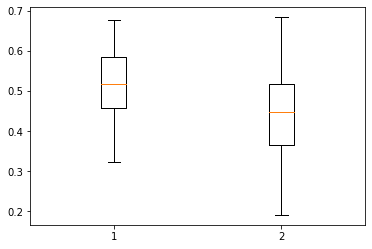

In [292]:
plt.boxplot(all_instability_by_owner)

In [295]:
scipy.stats.ttest_ind(all_instability_by_owner.loc['ipshita'],all_instability_by_owner.loc['roman'])

Ttest_indResult(statistic=2.757718538136444, pvalue=0.007020727420359605)

(0.2141921117089408, 0.03817152472467636)

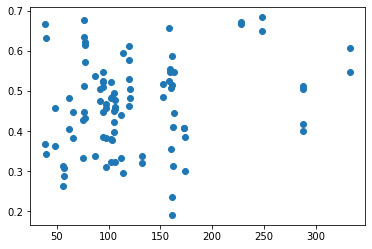

In [311]:
all_instability_ratio

corresponding_npyr=np.concatenate([[n]*len(x) for x,n in zip(subdb['ratio'].values,subdb['n_pyr_putative'].values)])
plt.scatter(corresponding_npyr,all_instability_ratio)
scipy.stats.pearsonr(corresponding_npyr,all_instability_ratio)

(array([ 2.,  2., 12., 11., 10., 19., 15.,  8.,  7.,  8.]),
 array([0.19083969, 0.24012782, 0.28941594, 0.33870407, 0.38799219,
        0.43728031, 0.48656844, 0.53585656, 0.58514468, 0.63443281,
        0.68372093]),
 <BarContainer object of 10 artists>)

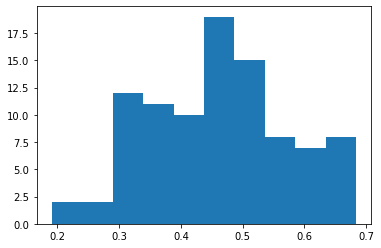

In [299]:
plt.hist(all_instability_ratio)

In [281]:
failed_l[2].data_dir_full

'/mnt/home/szheng/ceph/ad/roman_data/e14/e14_2m2/e14_2m2_201017'

In [279]:
import nmf_one_session as nos
reload(nos)
reload(prep)
nos.nmf_one_session('/mnt/home/szheng/ceph/ad/roman_data/e14/e14_2m2/e14_2m2_201013')

<module 'sys' (built-in)>
load *ripples.events.mat failed
/mnt/home/szheng/ceph/ad/roman_data/e14/e14_2m2/e14_2m2_201013/py_data/spk_beh_df.p saved!
/mnt/home/szheng/ceph/ad/roman_data/e14/e14_2m2/e14_2m2_201013/py_data/nmf made!
/mnt/home/szheng/ceph/ad/roman_data/e14/e14_2m2/e14_2m2_201013/py_data/nmf/nmf_4.p saved!
/mnt/home/szheng/ceph/ad/roman_data/e14/e14_2m2/e14_2m2_201013/py_figures/nmf made!
/mnt/home/szheng/ceph/ad/roman_data/e14/e14_2m2/e14_2m2_201013/py_figures/nmf/nmf_4.pdf saved!


{'W_df_peaks_only_post_sorted_d': {(0,
   0.0):                               0         1         2         3       sum  \
  factor     lin_binned                                                     
  0      193 2           0.305671  0.000000  0.056900  0.035058  0.397629   
         64  3           0.305570  0.000000  0.042312  0.000000  0.347881   
         40  3           0.305506  0.108798  0.034682  0.000000  0.448986   
         103 3           0.305487  0.000589  0.010230  0.000000  0.316305   
         147 1           0.305480  0.008600  0.017881  0.010196  0.342156   
  ...                         ...       ...       ...       ...       ...   
  3      48  2           0.123452  0.165756  0.006180  0.190983  0.486371   
         181 2           0.000000  0.140607  0.085498  0.146625  0.372730   
         49  8           0.053192  0.120281  0.112453  0.135800  0.421725   
         177 7           0.000251  0.089888  0.086200  0.090120  0.266460   
         185 3           0.024

            opt_p opt_n opt_issig
                                 
lin_binned                       
1           0.122     4     False
4           0.016     1      True
8           0.620     1     False


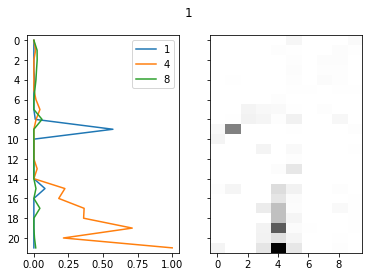

            opt_p opt_n opt_issig
                                 
lin_binned                       
1           0.026     1      True
5           0.094     1     False
8           0.142     4     False


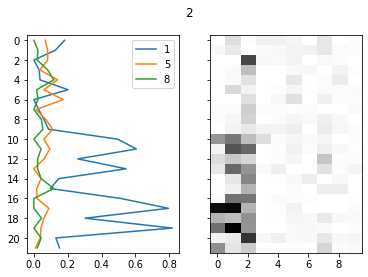

            opt_p opt_n opt_issig
                                 
lin_binned                       
6           0.046     2      True


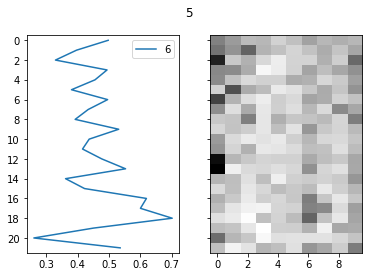

            opt_p opt_n opt_issig
                                 
lin_binned                       
1           0.050     1     False
6           0.004     1      True


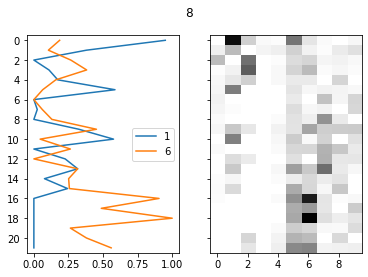

            opt_p opt_n opt_issig
                                 
lin_binned                       
1           0.002     2      True
3           0.010     1      True


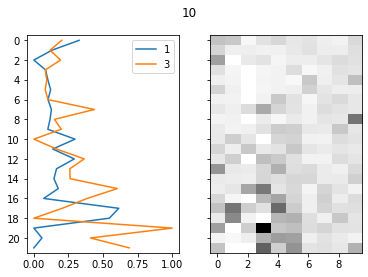

            opt_p opt_n opt_issig
                                 
lin_binned                       
1           0.018     1      True
3           0.304     4     False
6           0.226     5     False


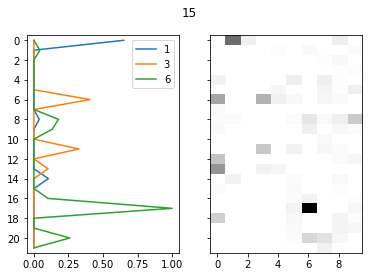

            opt_p opt_n opt_issig
                                 
lin_binned                       
3           0.008     2      True
7           0.160     2     False


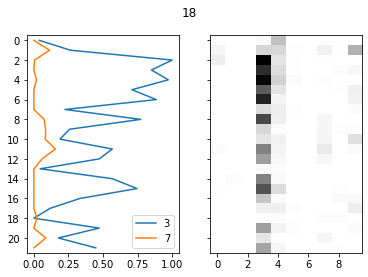

            opt_p opt_n opt_issig
                                 
lin_binned                       
3           0.022     1      True


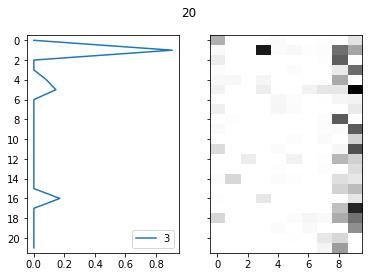

            opt_p opt_n opt_issig
                                 
lin_binned                       
2           0.000     2      True
5           0.278     1     False
7           0.290     2     False


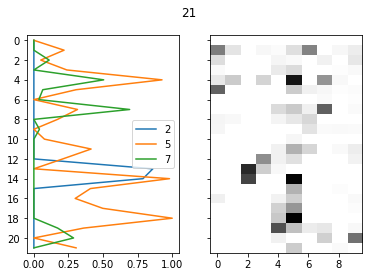

            opt_p opt_n opt_issig
                                 
lin_binned                       
1           0.366     4     False
4           0.000     3      True


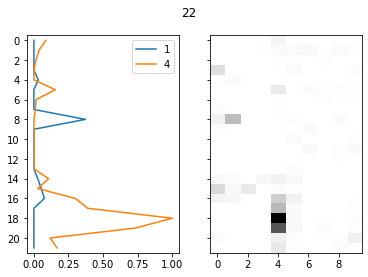

In [335]:
# ii=10
for ii in range(10):
    fig,axs=plt.subplots(1,2,sharey=True)
    ind=  any_field_sig.index[any_field_sig][ii]
    nfields,ntrials = X_normed_restacked_df_peaks_only.loc[ind].shape
    ys=np.arange(ntrials)
    axs[0].plot(X_normed_restacked_df_peaks_only.loc[ind].T,np.tile(ys[:,None],(1,nfields)))
    axs[0].legend(X_normed_restacked_df_peaks_only.loc[ind].index)
    axs[0].set_yticks(ys[::2])
    # X_normed_restacked_df_peaks_only.loc[ind].T.plot(ax=axs[0])
    print(instability_df.loc[ind,['opt_p','opt_n','opt_issig']])
    axs[1].imshow(X_normed_restacked_df.loc[ind].T,aspect='auto',interpolation=None)
    fig.suptitle(ind)
    plt.show()

In [336]:
signal = X_normed_restacked_df_peaks_only.loc[21,5].values

In [177]:
signal=X_normed_restacked_df_peaks_only.loc[ind,6].values

In [340]:
reload(nt)
nt.test_contiguity(signal,n_shuffle=200,sig_thresh=0.05,n_change_pts=6)

100%|██████████| 200/200 [00:00<00:00, 230.61it/s]


(0.8441473165280781,
 array([1.19923856, 0.57001461, 0.83414038, 0.64641947, 1.01471356,
        1.21316747, 0.73808929, 0.90903005, 0.62856454, 0.52837658,
        0.92263477, 0.91700207, 0.54066109, 1.42402547, 0.35086823,
        1.03752631, 0.94725555, 0.67400056, 1.0337248 , 0.91876841,
        0.94247673, 0.45956163, 1.12432832, 1.10726149, 1.07077592,
        0.69912349, 1.00827586, 0.9212104 , 1.05161355, 0.99240237,
        0.82656217, 0.36032445, 0.23542159, 1.01167254, 0.71371347,
        0.91541713, 1.38443888, 0.71515957, 1.18700091, 0.97768733,
        1.23234458, 0.57782235, 0.77089728, 0.53672361, 1.33503459,
        0.73616663, 0.26754846, 0.9817861 , 1.02297726, 0.69540298,
        0.87818454, 0.73560069, 0.88482421, 0.51563336, 0.90968177,
        0.7520819 , 0.80057131, 0.72995319, 1.14204509, 0.8254878 ,
        0.85931982, 0.94919215, 0.99485743, 1.20368516, 1.19901931,
        1.1295795 , 0.76877043, 0.32728182, 0.82954138, 1.00605267,
        1.06304296, 0.76351

In [103]:
instability_df.loc[ind]

,p,issig,error
lin_binned,,,
1,0.02,True,0.849693
6,0.02,True,0.706809
